Business Understanding

#Business Understanding
Syria Tel is facing a challege with customer churn as customers are leavung the service. Losing customers is costly due to the lost revenue and the expenses that are associated with acquiring new customers. Prediciting which customers are likely to churn allows Syria Tel to take proactive measures such as offering personalized promotions, improving customer service and adjusting pricing strategies to retain them. 

#Problem Statement
Customer churn is a major issue in the industry as it leads to revenue loss and increased customer acquisition costs. The challenge is to develop a machine learning model that can perfectly predict whether a customer will churn based in historical usage and demographic data. Identifying patterns and risk factors associated with the moving customers will assist the company implement the targeted retention strategies.

Given customer attributes such as call usage, account information, contract type, and service engagement metrics, we aim to:

Classification Task: Predict whether a customer will leave SyriaTel or remain a subscriber.
Pattern Analysis: Identify key factors influencing customer churn to support business decision-making.

#Objectives
Classification
Develop a predictive model to classify customers as either churners or non-churners.
Engineer relevant features from customer usage patterns and demographics.
Optimize model performance using feature selection, hyperparameter tuning and evaluation metrics. 
Business Insights & Retention Strategy
Identify the key drivers of churn.
Provide actionable recommendations for customer retention strategies based on predictive insights.
Help SyriaTel reduce churn rates and improve customer loyalty through targeted marketing and service improvements.

Data Understanding

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [251]:
df= pd.read_csv('bigml.data.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [166]:
df.shape

(3333, 21)

In [167]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Data Cleaning 

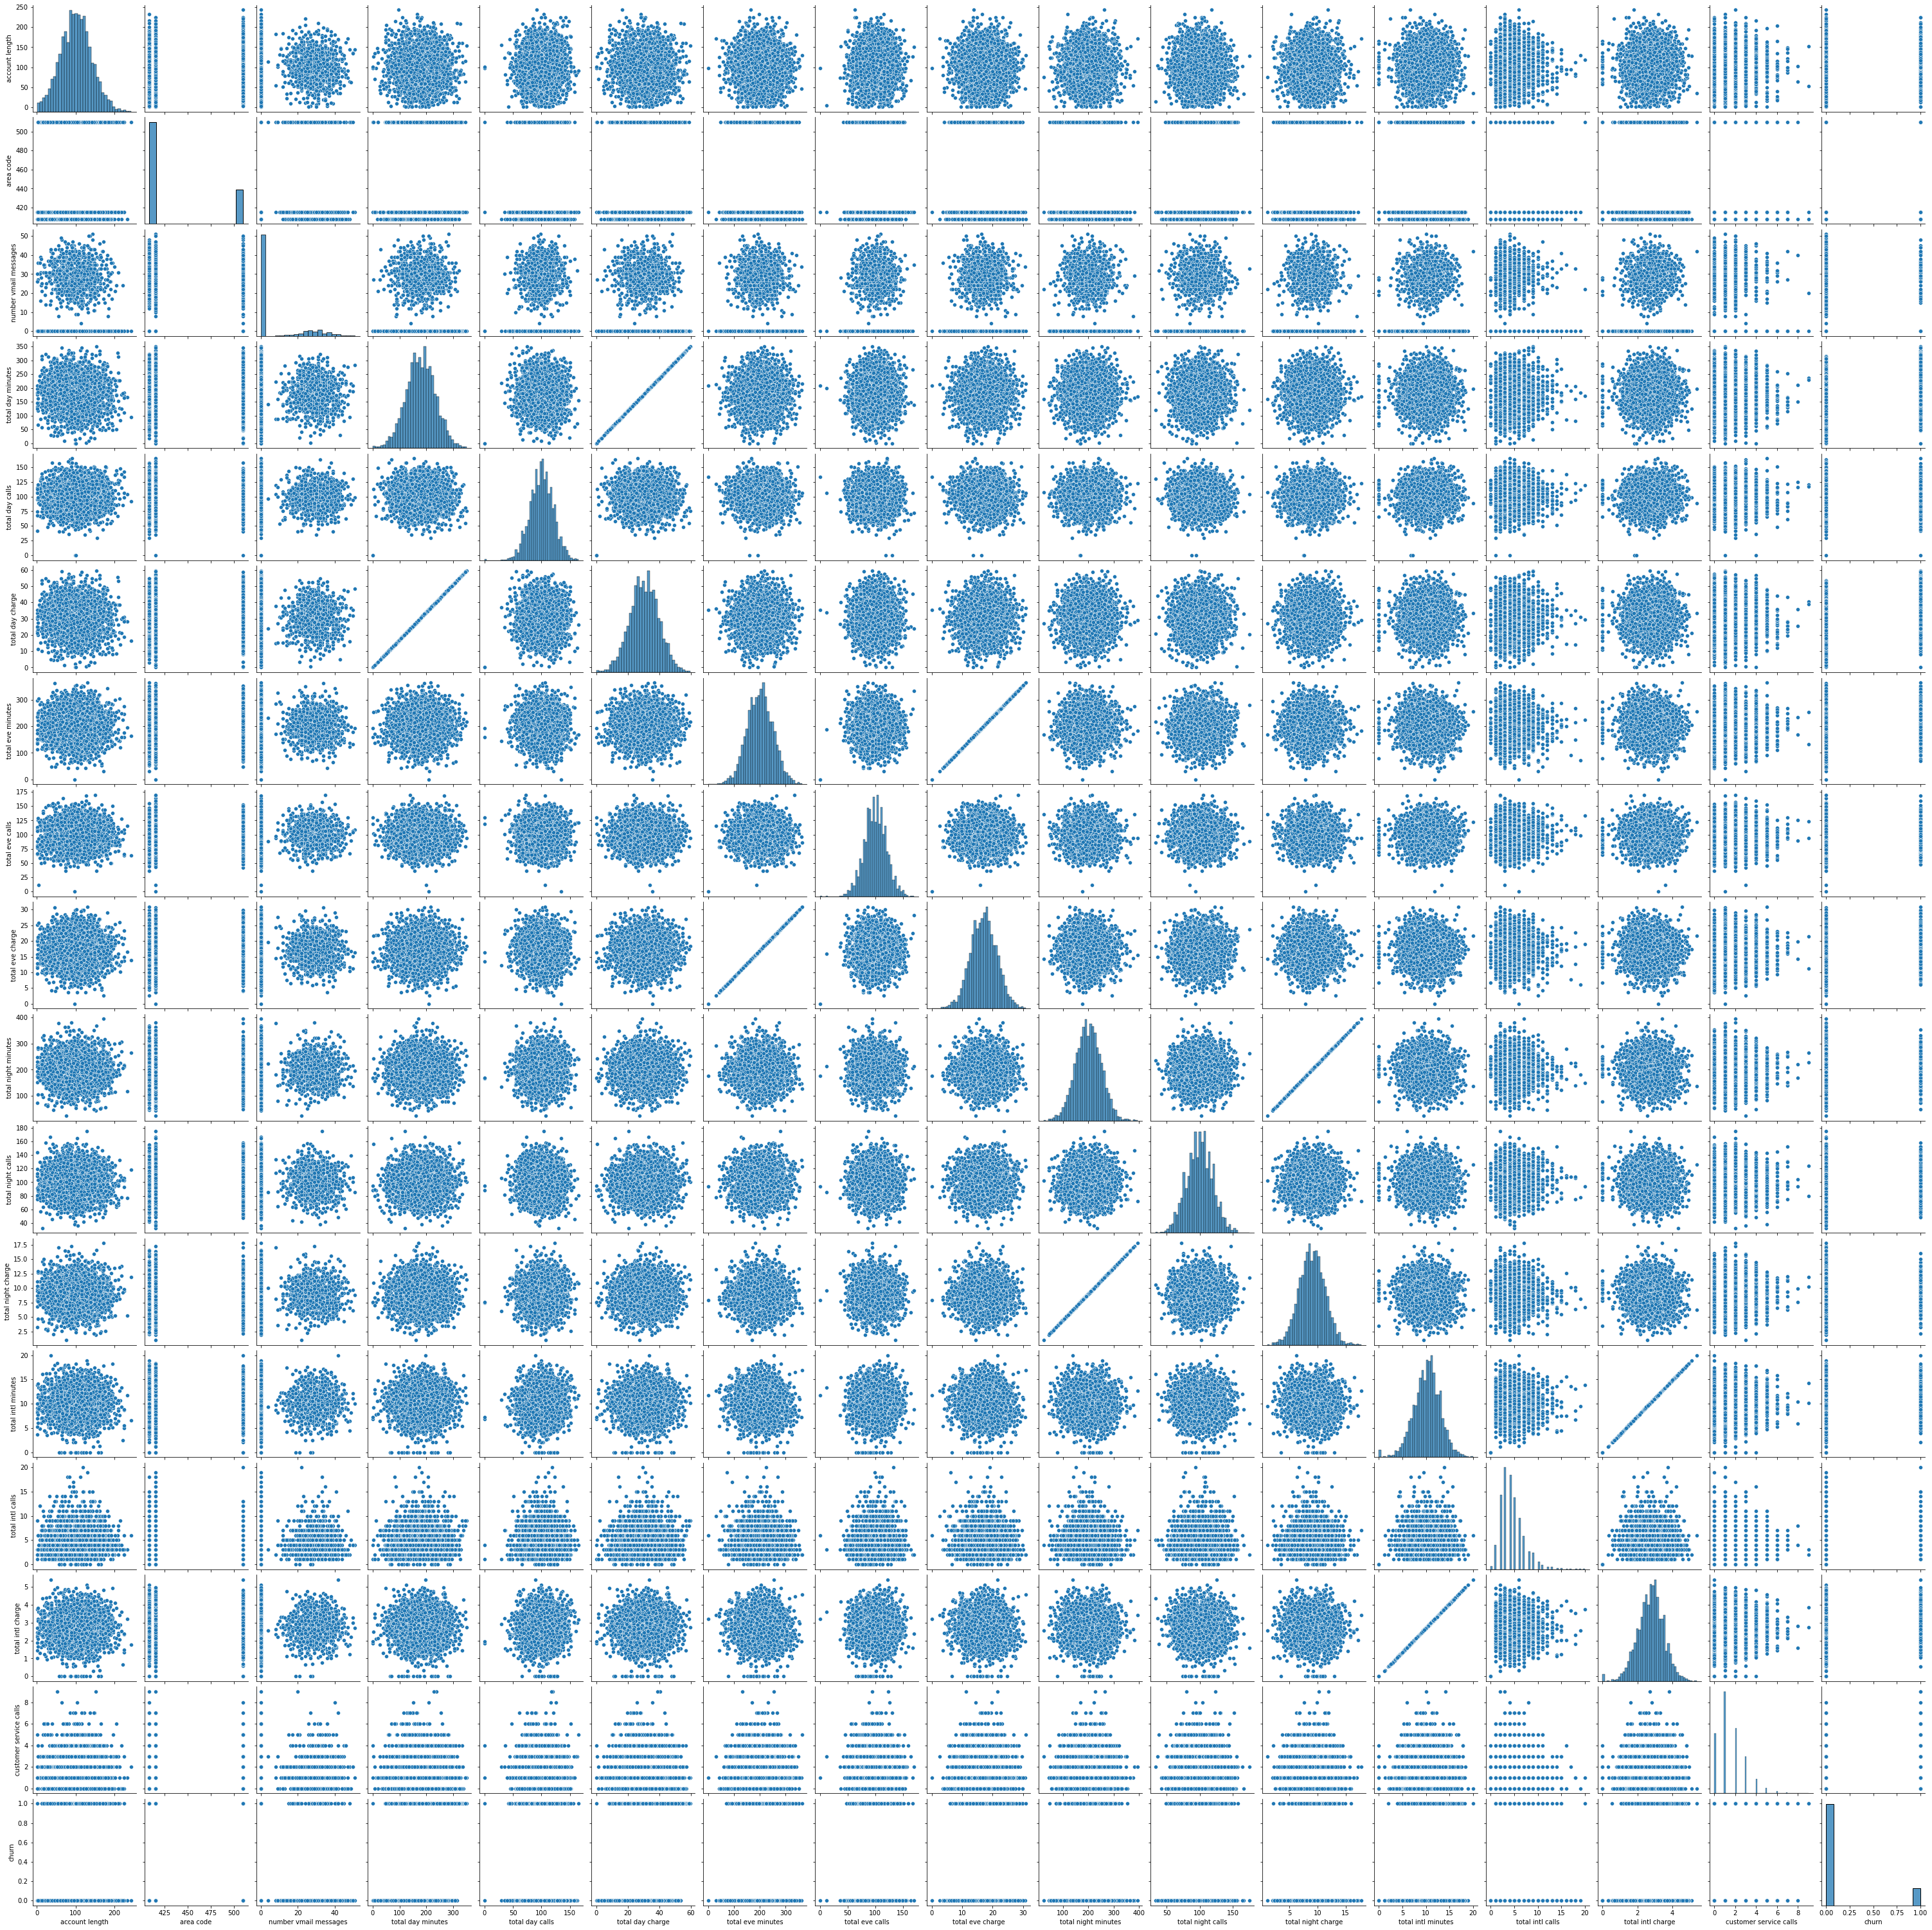

In [170]:
sns.pairplot(df)

In [7]:
#Check missing values
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [175]:
print(df.isnull().values.any()) 

False


In [173]:
#Phone number is likely not useful for analysis and should be dropped
#area code might not be necessary for the analysis
#international plan and voice mail plan are stored as strings and should be converted into binary.
df = df.drop(columns=["phone number"])

In [174]:
print(df["area code"].value_counts())

415    1655
510     840
408     838
Name: area code, dtype: int64


In [11]:
print(df.groupby("area code")["churn"].mean())


area code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


In [12]:
#The area code does not strongly infuence churn thus it can be dropped. 
df.drop(columns=["area code"], inplace=True)

In [13]:
#convert the categorical variables
df["international plan"] = df["international plan"].map({"yes": 1, "no": 0})
df["voice mail plan"] = df["voice mail plan"].map({"yes": 1, "no": 0})
df["churn"] = df["churn"].astype(int)  # Convert True/False to 1/0


In [14]:
#Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")



Number of duplicate rows: 0


In [176]:
print(df.columns)

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


In [133]:
import numpy as np

# Define a function to detect and remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_filtered = df.copy()  # Ensure df_filtered is initialized properly
    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter only the numeric column but keep all categorical columns
        df_filtered = df_filtered[~((df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound))]
    
    return df_filtered

# Select only numeric columns (preserves categorical variables)
num_cols = df.select_dtypes(include=np.number).columns  

# Apply IQR method without removing categorical columns
df_cleaned = remove_outliers_iqr(df, num_cols)

# Verify 'state' is still present
print("Columns after outlier removal:", df_cleaned.columns.tolist())
print("Unique states remaining:", df_cleaned['state'].nunique())  # Check if all states are still there


Columns after outlier removal: ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']
Unique states remaining: 51


In [134]:
#Verify changes
import matplotlib.pyplot as plt
import seaborn as sns
print(df_cleaned.describe())

       account length    area code  number vmail messages  total day minutes  \
count     2797.000000  2797.000000            2797.000000        2797.000000   
mean       100.392206   437.445120               8.131212         179.995817   
std         39.329033    42.542728              13.707224          52.589516   
min          1.000000   408.000000               0.000000          37.700000   
25%         73.000000   408.000000               0.000000         144.000000   
50%        100.000000   415.000000               0.000000         179.800000   
75%        127.000000   510.000000              19.000000         216.000000   
max        205.000000   510.000000              50.000000         322.500000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      2797.000000       2797.000000        2797.000000      2797.000000   
mean        100.577047         30.599828         201.288059       100.020379   
std          19.284581          8.94015

In [139]:
#Rechecking for outliers
outlier_counts = {}
for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

print("Remaining Outlier Counts:", outlier_counts)

Remaining Outlier Counts: {'account length': 0, 'area code': 0, 'number vmail messages': 5, 'total day minutes': 0, 'total day calls': 0, 'total day charge': 0, 'total eve minutes': 0, 'total eve calls': 3, 'total eve charge': 0, 'total night minutes': 0, 'total night calls': 0, 'total night charge': 0, 'total intl minutes': 0, 'total intl calls': 0, 'total intl charge': 0, 'customer service calls': 0}


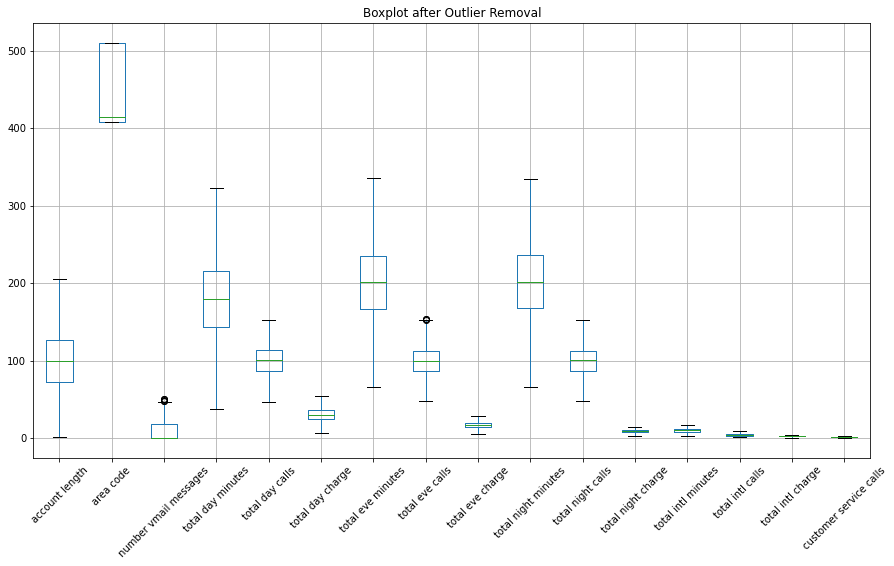

In [141]:
#Boxplots to visualize outliers
plt.figure(figsize=(15, 8))
df_cleaned[num_cols].boxplot(rot=45)
plt.title("Boxplot after Outlier Removal")
plt.show()

Feature Engineering

In [142]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'churn' if it exists in the list
if 'churn' in numerical_features:
    numerical_features.remove('churn')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows
df.head()


state  account length  area code phone number international plan  \
0    KS        0.676489  -0.523603     382-4657                 no   
1    OH        0.149065  -0.523603     371-7191                 no   
2    NJ        0.902529  -0.523603     358-1921                 no   
3    OH       -0.428590  -0.688834     375-9999                yes   
4    OK       -0.654629  -0.523603     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes               1.234883           1.566767         0.476643   
1             yes               1.307948          -0.333738         1.124503   
2              no              -0.591760           1.168304         0.675985   
3              no              -0.591760           2.196596        -1.466936   
4              no              -0.591760          -0.240090         0.626149   

   total day charge  ...  total eve calls  total eve charge  \
0          1.567036  ...        -0.055940         -0.070427   
1         -0.334013  ...         0.144867         -0.107549   
2          1.168464  ...         0.496279         -1.573900   
3          2.196759  ...        -0.608159         -2.743268   
4         -0.240041  ...         1.098699         -1.037939   

   total night minutes  total night calls  total night charge  \
0             0.866743          -0.465494            0.866029   
1             1.058571           0.147825            1.059390   
2            -0.756869           0.198935           -0.755571   
3            -0.078551          -0.567714           -0.078806   
4            -0.276311           1.067803           -0.276562   

   total intl minutes  total intl calls  total intl charge  \
0           -0.085008         -0.601195          -0.085690   
1            1.240482         -0.601195           1.241169   
2            0.703121          0.211534           0.697156   
3           -1.303026          1.024263          -1.306401   
4           -0.049184         -0.601195          -0.045885   

   customer service calls  churn  
0               -0.427932  False  
1               -0.427932  False  
2               -1.188218  False  
3                0.332354  False  
4                1.092641  False  

[5 rows x 21 columns]

In [143]:
#Check Mean and Standard Deviation
# Check if the mean is approximately 0 and std dev is 1
df[numerical_features].describe().T


count          mean      std       min       25%  \
account length          3333.0  1.470971e-16  1.00015 -2.513172 -0.679745   
area code               3333.0  4.221046e-16  1.00015 -0.688834 -0.688834   
number vmail messages   3333.0  7.035077e-17  1.00015 -0.591760 -0.591760   
total day minutes       3333.0  7.312216e-16  1.00015 -3.301096 -0.662424   
total day calls         3333.0 -1.934646e-16  1.00015 -5.005247 -0.669570   
total day charge        3333.0 -2.835349e-16  1.00015 -3.301162 -0.662376   
total eve minutes       3333.0 -6.821892e-17  1.00015 -3.963622 -0.678030   
total eve calls         3333.0  3.288365e-16  1.00015 -5.025911 -0.658361   
total eve charge        3333.0  1.385697e-16  1.00015 -3.963679 -0.678312   
total night minutes     3333.0  7.887813e-17  1.00015 -3.513648 -0.669855   
total night calls       3333.0 -4.903235e-17  1.00015 -3.429870 -0.669934   
total night charge      3333.0 -4.370275e-17  1.00015 -3.515366 -0.667679   
total intl minutes      3333.0 -3.336332e-16  1.00015 -3.667413 -0.622369   
total intl calls        3333.0 -8.527366e-18  1.00015 -1.820289 -0.601195   
total intl charge       3333.0  2.728757e-16  1.00015 -3.668210 -0.616434   
customer service calls  3333.0  8.527366e-18  1.00015 -1.188218 -0.427932   

                             50%       75%       max  
account length         -0.001628  0.651374  3.564766  
area code              -0.523603  1.718817  1.718817  
number vmail messages  -0.591760  0.869554  3.134591  
total day minutes      -0.006888  0.672520  3.140422  
total day calls         0.028125  0.675985  3.217588  
total day charge       -0.006730  0.672679  3.140803  
total eve minutes       0.008276  0.676833  3.209066  
total eve calls        -0.005739  0.697085  3.508382  
total eve charge        0.008459  0.676669  3.207980  
total night minutes     0.006486  0.680849  3.839081  
total night calls      -0.005505  0.658924  3.827739  
total night charge      0.004691  0.681456  3.836763  
total intl minutes      0.022464  0.667297  3.497397  
total intl calls       -0.194831  0.617898  6.307001  
total intl charge       0.020458  0.670619  3.496829  
customer service calls -0.427932  0.332354  5.654360

In [177]:
# Feature Engineering
df["total_call_minutes"] = df["total day minutes"] + df["total eve minutes"] + df["total night minutes"]
df["total_charges"] = df["total day charge"] + df["total eve charge"] + df["total night charge"] + df["total intl charge"]
df["call_intensity"] = df["total_call_minutes"] / (df["total day calls"] + df["total eve calls"] + df["total night calls"])

In [178]:
# Binning total call minutes into quartiles
df["call_minutes_category"] = pd.qcut(df["total_call_minutes"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Saving the updated dataset
processed_file_path = "bigml.processed_data.csv"
df.to_csv(processed_file_path, index=False)

print(f"Processed dataset saved at: {processed_file_path}")

Processed dataset saved at: bigml.processed_data.csv


Encoding

In [185]:
#Identify Non-Numeric Columns
non_numeric_cols = df.select_dtypes(include=["object"]).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['international plan', 'voice mail plan'], dtype='object')


In [186]:
#Convert 'yes/no' and similar values to binary (if applicable)
for col in non_numeric_cols:
    unique_values = df[col].unique()
    if set(unique_values) == {"yes", "no"}:
        df[col] = df[col].map({"yes": 1, "no": 0})
    else:
        print(f"⚠️ Warning: '{col}' has unexpected values: {unique_values}")

In [187]:
#Check if non-numeric values still exist
if df.select_dtypes(include=["object"]).shape[1] > 0:
    raise ValueError("Some categorical columns were not converted. Please check the dataset.")

In [179]:
# Perform Frequency Encoding on the 'state' column
state_counts = df['state'].value_counts()
df['state_encoded'] = df['state'].map(state_counts)

# Drop the original 'state' column 
df.drop(columns=['state'], inplace=True)

# Save the modified dataset
df.to_csv("bigml.data_encoded.csv", index=False)

print("Frequency encoding completed. Encoded dataset saved as 'bigml_encoded.csv'.")

Frequency encoding completed. Encoded dataset saved as 'bigml_encoded.csv'.


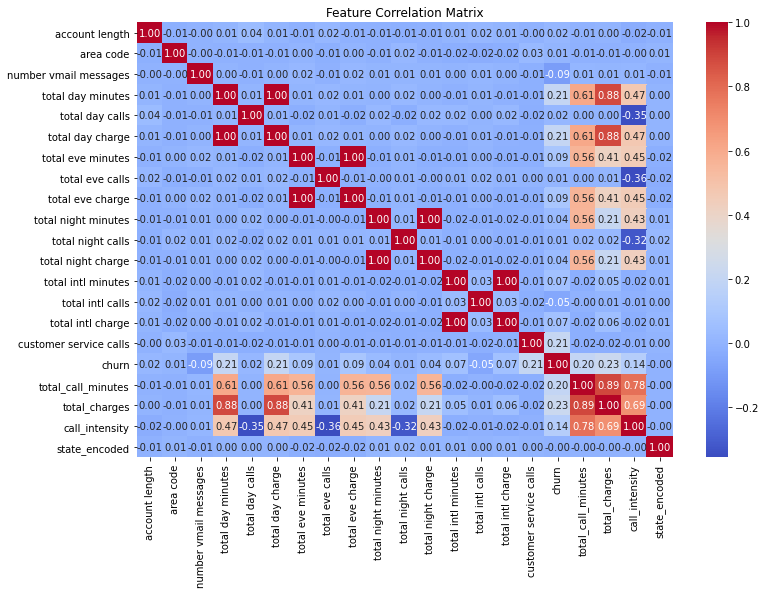

In [180]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [210]:
non_numeric_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: []


In [212]:
from sklearn.preprocessing import OrdinalEncoder

if non_numeric_cols:
    encoder = OrdinalEncoder()
    df[non_numeric_cols] = encoder.fit_transform(df[non_numeric_cols])

In [213]:
assert df.select_dtypes(include=["object"]).shape[1] == 0, "❌ Some categorical columns are still non-numeric!"
print("✅ All features are numeric. Proceeding to feature selection.")

✅ All features are numeric. Proceeding to feature selection.


Feature Selection 

In [238]:
print(df.dtypes)

account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
total_call_minutes        float64
total_charges             float64
call_intensity            float64
call_minutes_category       int64
state_encoded               int64
dtype: object


In [239]:
#convert categorical Features
mapping = {"Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5}
df["call_minutes_category"] = df["call_minutes_category"].map(mapping)

In [240]:
#Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
total_call_minutes        float64
total_charges             float64
call_intensity            float64
call_minutes_category     float64
state_encoded               int64
dtype: object


In [241]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold if needed
df_var = selector.fit_transform(df)
selected_features = df.columns[selector.get_support()]
df = df[selected_features]

print("✅ Features after Variance Threshold:", list(df.columns))


✅ Features after Variance Threshold: ['account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn', 'total_call_minutes', 'total_charges', 'call_intensity', 'state_encoded']


Feature Selection

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import LabelEncoder

In [243]:
#Encode categorical target variable if necessary
target_column = 'churn'
if df[target_column].dtype == 'object':
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[target_column])

In [244]:
# Splitting data into features and target
X = df.drop(columns=[target_column])  
y = df[target_column]  

In [245]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [246]:
# Feature selection using Tree-Based Model (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [247]:
# Select important features
selector = SelectFromModel(rf, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [248]:
selected_features = X.columns[selector.get_support()]
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)
rfe_selected_features = X.columns[rfe_selector.support_]
print("Features selected by Tree-Based Model:", list(selected_features))
print("Features selected by RFE:", list(rfe_selected_features))

Features selected by Tree-Based Model: ['international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'total_call_minutes', 'total_charges']
Features selected by RFE: ['international plan', 'number vmail messages', 'total day minutes', 'total day charge', 'total eve minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'total_call_minutes', 'total_charges']


In [249]:
#Transform data using the selected features
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]


In [258]:
file_path = "bigml.data.csv"
df = pd.read_csv(file_path)

In [257]:
#Save the refined dataset
X_train_final.to_csv("X_train_selected.csv", index=False)
X_test_final.to_csv("X_test_selected.csv", index=False)


Model Training

In [259]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split completed.")

Data split completed.


In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [261]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=500)


In [262]:
# Train the model
log_reg.fit(X_train_selected, y_train)

LogisticRegression(max_iter=500)

In [263]:
# Predictions
y_pred_logreg = log_reg.predict(X_test_selected)

In [264]:
# Evaluate
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8576
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.62      0.16      0.25       101

    accuracy                           0.86       667
   macro avg       0.74      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667



In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_selected, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9805
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       566
        True       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



In [266]:
#XGBoost Training & Evaluation
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train_selected, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9805
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       566
        True       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



In [267]:
#Hyperparameter Tuning for XGBoost
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Predict using the best model
y_pred_best_xgb = best_xgb.predict(X_test_selected)

# Evaluate performance
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"Optimized XGBoost Accuracy: {best_xgb_accuracy:.4f}")
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_best_xgb))


Optimized XGBoost Accuracy: 0.9805
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       566
        True       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



In [271]:
#Saving the Model
import joblib  

# Replace 'your_model_variable' with the actual trained model variable
joblib.dump(xgb_model, "xgboost_model.pkl")  

print("Model saved successfully! 💾")



Model saved successfully! 💾


Model Evaluation

In [273]:
print(globals().keys())  


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'np', 'plt', 'sns', 'warnings', '_i2', 'df', '_2', '_i3', '_3', '_i4', '_i5', '_5', '_i6', '_6', '_i7', 'missing_values', '_i8', '_i9', '_i10', '_i11', '_i12', '_i13', '_i14', 'duplicate_rows', '_i15', 'stats', 'detect_outliers_zscore', '_i16', 'detect_outliers_iqr', 'num_cols', 'iqr_outliers', '_i17', 'remove_outliers_iqr', 'df_cleaned', '_i18', '_i19', '_i20', 'outlier_counts', 'col', 'Q1', 'Q3', 'IQR', 'lower_bound', 'upper_bound', 'outliers', '_i21', 'StandardScaler', 'numerical_features', '_i22', 'scaler', '_22', '_i23', '_23', '_i24', '_i25', '_i26', '_i27', '_27', '_i28', '_28', '_i29', '_29', '_i30', '_i31', '_31', '_i32', 'num_unique_states', '_i33', '_i34', '_i35', 'df_encoded', '_i36', '_i37', '_i38', '_i39', '_i40', '_i41', '_41', '_i42', '_i43', '_i44', 

In [275]:
import xgboost as xgb

# Define the best parameters (from your tuning process)
best_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}

# Train the model again
xgb_best = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

print("Model retrained successfully!")


[17:09:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Model retrained successfully!


In [277]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions
y_pred = xgb_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


XGBoost Model Accuracy: 0.9805

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       566
        True       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667


Confusion Matrix:
[[566   0]
 [ 13  88]]


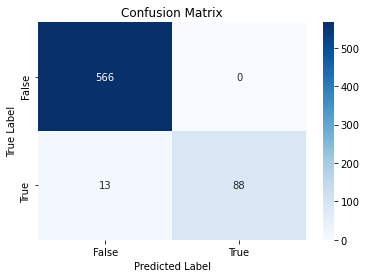

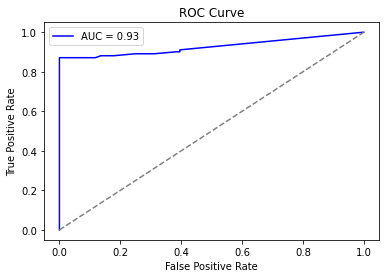

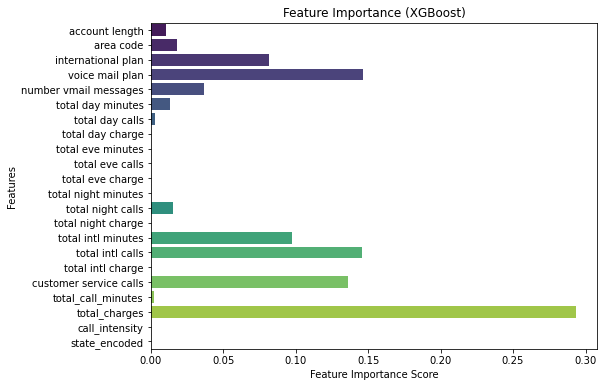

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2. ROC Curve & AUC Score
y_prob = xgb_best.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 3. Feature Importance Plot
plt.figure(figsize=(8, 6))
importance = xgb_best.feature_importances_
sns.barplot(x=importance, y=X_train.columns, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.show()


Conclusion and Recommendation
